In [42]:
import os
import re
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
plt.rcParams["font.family"] = "Arial"

In [44]:
__path__ = os.getcwd()

In [45]:
lung_manifest = os.path.join(__path__, "lung-graph-manifest.txt")
lung_manifest_files = open(lung_manifest, "r").read().split('\n')

In [46]:
lung_results = os.path.join(__path__, "lung_output")
lung_result_files = next(os.walk(lung_results), (None, None, []))[2]

In [47]:
results = {}
for f in lung_result_files:
    results[f] = pd.read_csv(os.path.join(lung_results, f), sep="\t")

In [54]:
_d = {}
for p in [
        "avg_noCollapse",
        "mod_noCollapse",
        "avg_collapse",
        "mod_collapse"
    ]:
        pattern =   p
        _d[pattern] = {
            "rep0": {}, 
            "rep1": {}, 
            "rep2": {}, 
            "rep3": {},
            "rep4": {},
            "rep5": {}
        }
        
for x in lung_manifest_files:
    try:
        percent =   str(re.search('dropout(.*)percent', x)[1])
    except:
        continue
    replicate = re.search('percent_(.*).mvrs', x)[1]
    for p in [
        "avg_noCollapse",
        "mod_noCollapse",
        "avg_collapse",
        "mod_collapse"
    ]:
        pattern =   p
        try:
            this_df = results['lung_metabolomics_dropout{0}percent_{1}_{2}.csv'.format(percent, replicate, pattern)]
            _d[pattern][replicate][str(percent)+"%"] = this_df[this_df.columns[2]].unique().size
        except:
            _d[pattern][replicate][str(percent)+"%"] = np.nan

compiled_data = {}
for k in _d.keys():       
    data = pd.DataFrame(_d[k])
    compiled_data[k] = data.sort_index()

C:\Users\jorda\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jorda\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jorda\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jorda\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jorda\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the p

Text(0.06, 0.5, '# of Reaction Patterns')

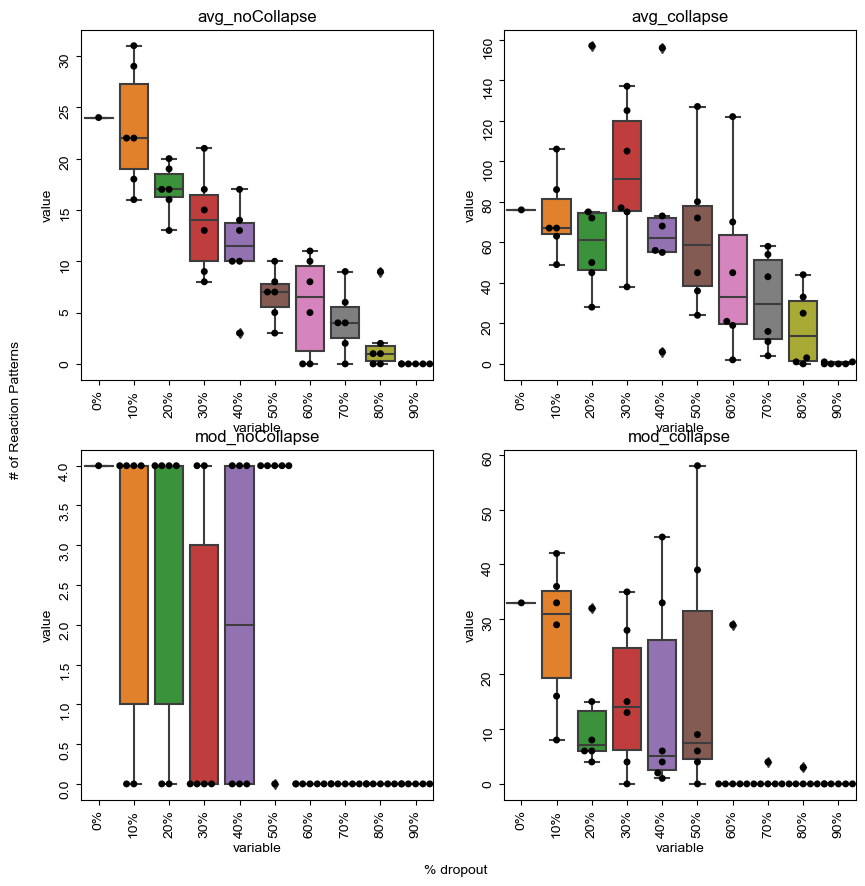

In [56]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(10,10))
x_count = 0
y_count = 0
counter = 0
for c in compiled_data:
    d = compiled_data[c].T.melt()
    sns.boxplot(data=d, x="variable", y="value", ax=axes[x_count, y_count])
    sns.swarmplot(data=d, x="variable", y="value", color="black", ax=axes[x_count, y_count])
    axes[x_count, y_count].tick_params(labelrotation=90)
    axes[x_count, y_count].set_title(c)
    counter += 1
    if x_count == 0:
        x_count = 1
    else:
        x_count = 0
    if counter % 2 == 0:
        y_count += 1
        
fig.text(0.5, 0.04, '% dropout', ha='center', va='center')
fig.text(0.06, 0.5, '# of Reaction Patterns', ha='center', va='center', rotation='vertical')